<a href="https://colab.research.google.com/github/Anjalichimnani/EVA4/blob/master/Assignment_13/YoloV3_Localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The YoloV3 Implementation is for a Custom Kung Fu Panda Class. There are 500 (~550) images identified and the model is learnt over the annotated content. 
There Model is run on 3 Videos with different characteristics: Low Light Videos, Video with many characters, and Video with many variations in  characters poses. The Videos are in the end of the colab file

In [0]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 14.88 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [0]:
ls

gdrive/  sample_data/  YoloV3/


In [0]:
cd YoloV3/

/content/YoloV3


In [0]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png


In [0]:
root_path = '/content/gdrive/EVA4/Assignment_13/files/'

In [0]:
# Prepare for Small Coco Dataset learning using Weights 
mkdir /content/YoloV3/weights
!cp '/content/gdrive/My Drive/EVA4/Assignment_13/files/YoloV3/weights/yolov3-spp-ultralytics.pt' /content/YoloV3/weights

In [0]:
# Learning over Small Coco Data set

!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-05-20 05:30:26.335975: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 6707.67it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 114.32it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00,

In [0]:
# Preparing to add Kung Fu Panda Images to the Custom Images
!rm -r /content/YoloV3/data/customdata/*
!mkdir /content/YoloV3/data/customdata/images
!mkdir /content/YoloV3/data/customdata/labels
!ls /content/YoloV3/data/customdata/

images	labels


In [0]:
# Adding Kung Fu Panda Images to the Custom Images
# Images, Labels, and Train and Test files along with class names

!gsutil cp '/content/gdrive/My Drive/EVA4/Assignment_13/files/data/kungfupanda_files/Annotation/Images/kungfupanda/*' /content/YoloV3/data/customdata/images
!gsutil cp '/content/gdrive/My Drive/EVA4/Assignment_13/files/data/kungfupanda_files/Annotation/Labels/kungfupanda/*' /content/YoloV3/data/customdata/labels
!gsutil cp '/content/gdrive/My Drive/EVA4/Assignment_13/files/data/kungfupanda_files/Annotation/custom*' /content/YoloV3/data/customdata/

In [0]:
# Transfer learning on the custom Data set
# It creates a new weight file that could be used to train later over any Image/Video as descrbed below:

!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-05-20 09:25:01.826561: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (535 found, 2 missing, 15 empty, 0 duplicate, for 552 images): 100% 552/552 [00:00<00:00, 10886.31it/s]
Caching images (0.3GB): 100% 552/552 [00:03<00:00, 157.83it/s]
Caching labels (535 found, 2 missing, 15 empty, 0 duplicate, for 552 images): 100% 55

In [0]:
# Apply the Learning over any Images 
# To Demonstrate first the Training images are taken

!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/552 data/customdata/images/img001.jpg: 512x512 1 kung fu pandas, Done. (0.020s)
image 2/552 data/customdata/images/img002.jpg: 256x512 1 kung fu pandas, Done. (0.017s)
image 3/552 data/customdata/images/img003.jpg: 512x384 1 kung fu pandas, Done. (0.018s)
image 4/552 data/customdata/images/img004.jpg: 512x512 1 kung fu pandas, Done. (0.020s)
image 5/552 data/customdata/images/img005.jpg: 512x320 1 kung fu pandas, Done. (0.017s)
image 6/552 data/customdata/images/img006.jpg: 512x384 1 kung fu pandas, Do

In [0]:
# Preparing to detect on new images

!mkdir /content/YoloV3/data/customdata_detect
!mkdir /content/YoloV3/data/customdata_detect/images

!gsutil cp '/content/gdrive/My Drive/EVA4/Assignment_13/files/data/images_detect/*' /content/YoloV3/data/customdata_detect/images
!gsutil cp '/content/gdrive/My Drive/EVA4/Assignment_13/files/data/kungfupanda_files/Annotation/custom.names' /content/YoloV3/data/customdata_detect/

In [0]:
# Detect on New Imags using after the Model training 

!python detect.py --source 'data/customdata_detect/images' --names 'data/customdata_detect/custom.names' --conf-thres 0.35 --output out_out
!gsutil cp /content/YoloV3/out_out/* '/content/gdrive/My Drive/EVA4/Assignment_13/files/data/out_out/'

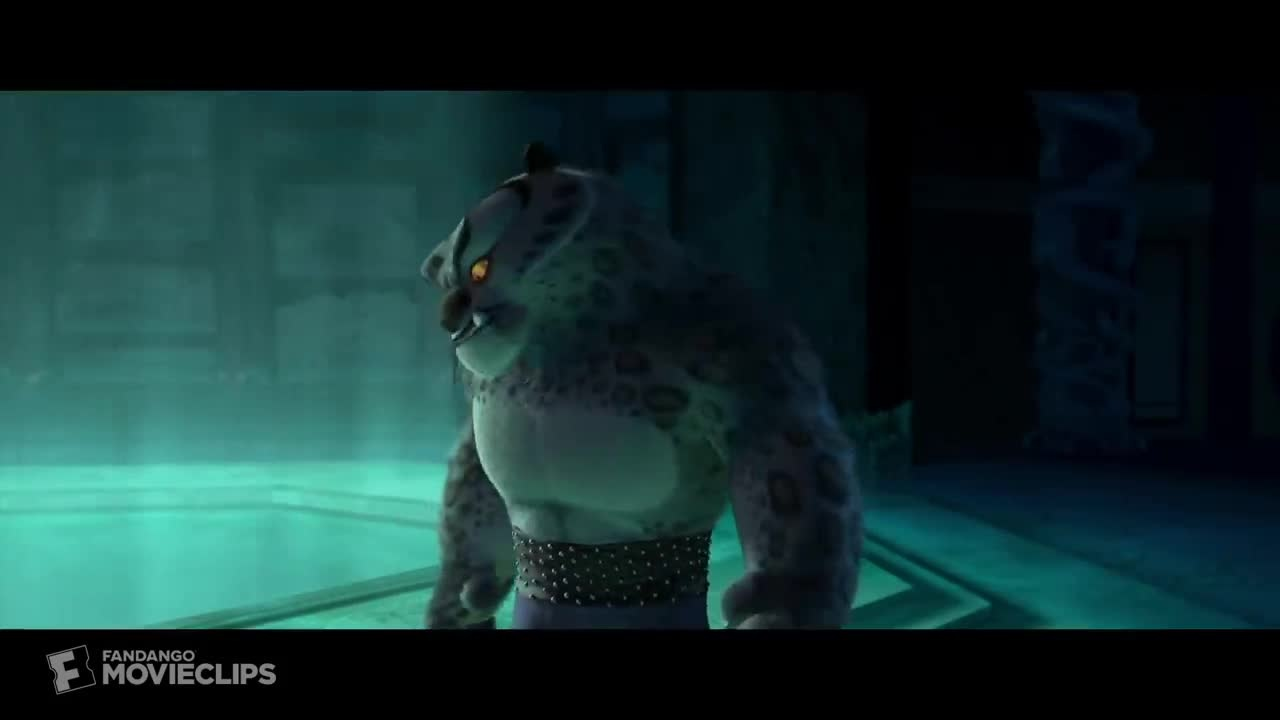

In [0]:
Image(filename='out_out/img001.jpg', width=600)

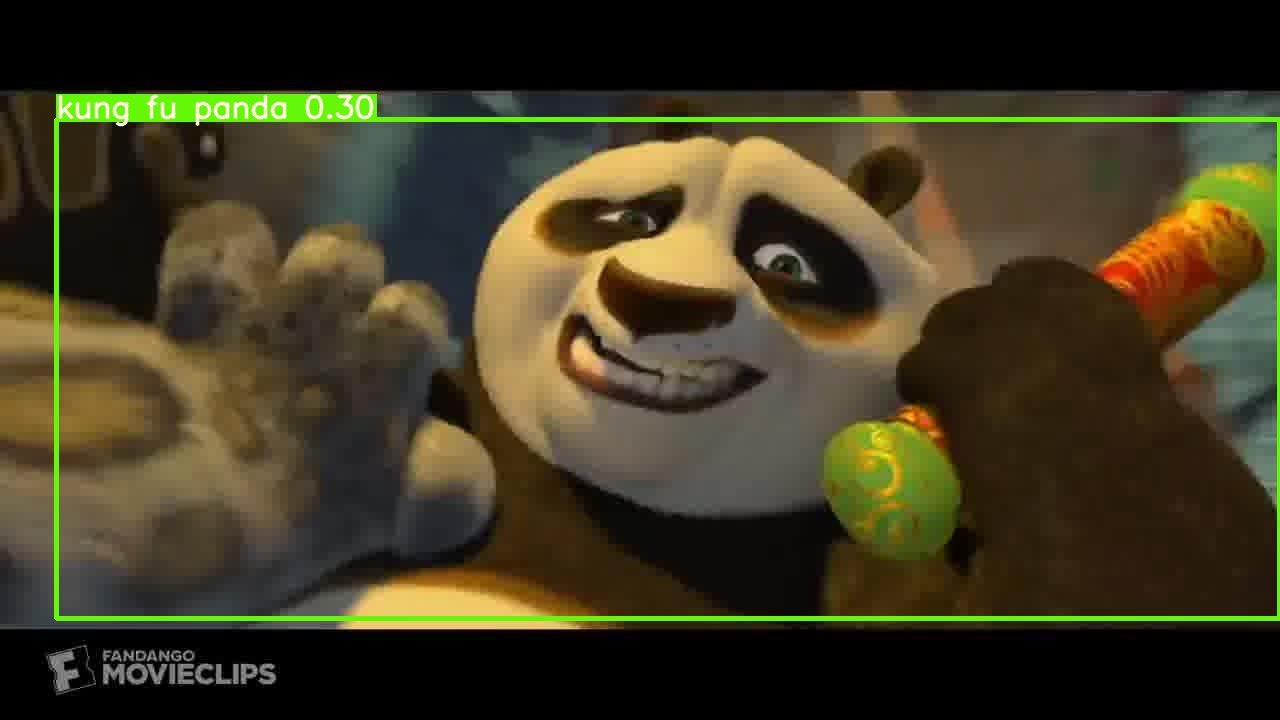

In [0]:
Image(filename='out_out/img160.jpg', width=600)

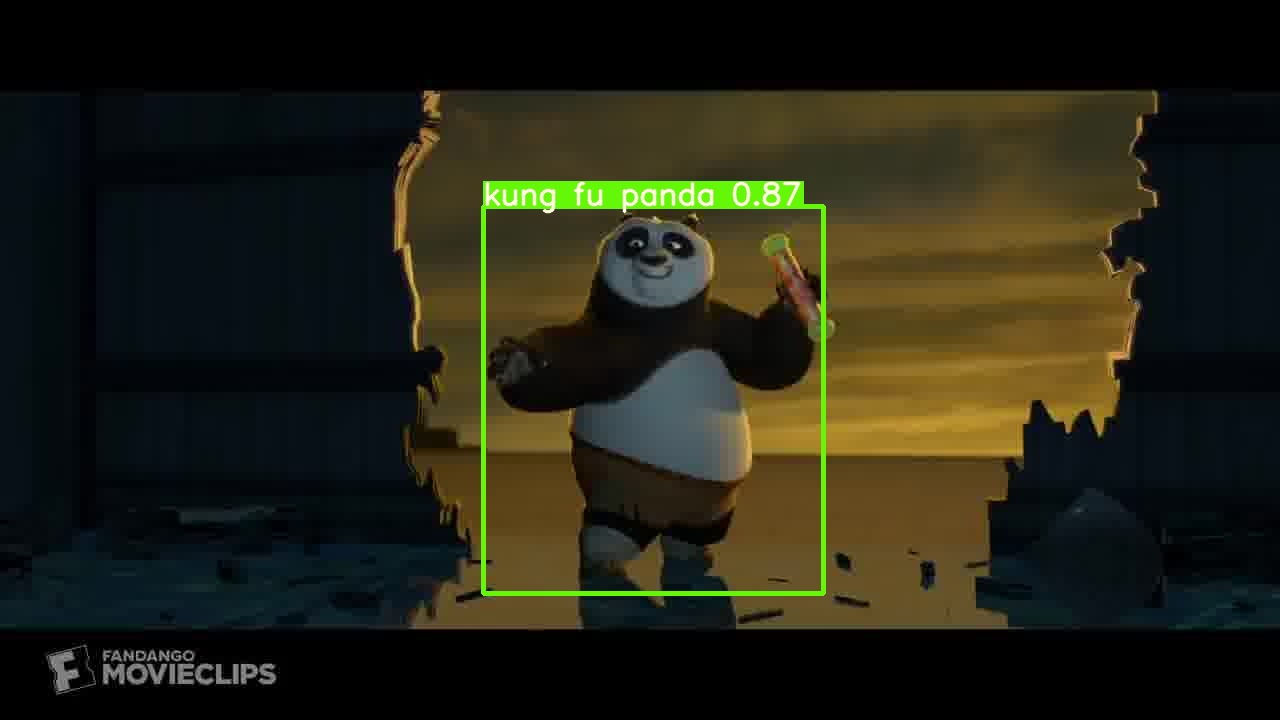

In [0]:
Image(filename='out_out/img050.jpg', width=600)

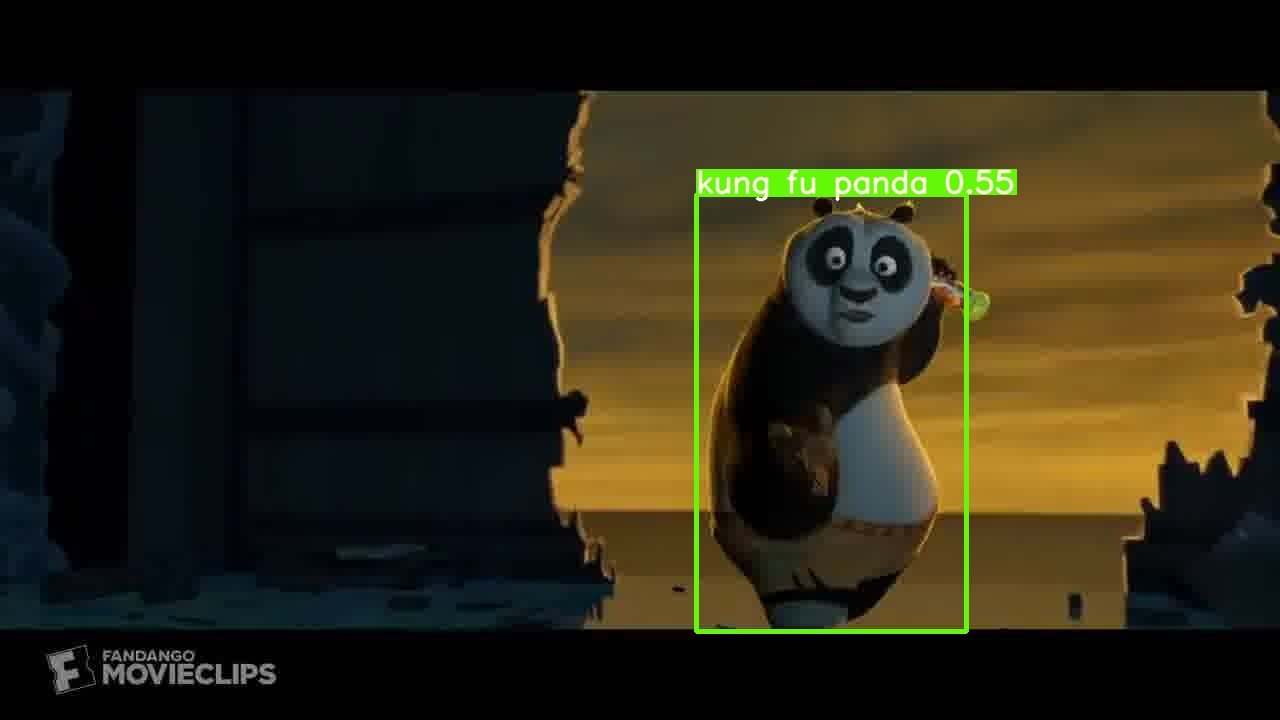

In [0]:
Image(filename='out_out/img132.jpg', width=600)

In [0]:
# Prepare for Custom Kung Fu Panda Class Learning using the Weights file produced y the Model Training

!cp '/content/gdrive/My Drive/EVA4/Assignment_13/files/YoloV3/weights/last.pt' /content/YoloV3/weights  # Custom Weights File after training on Kung Fu Panda

In [0]:
# Preparing to detect on new images

!mkdir /content/YoloV3/data/customdata_detect_beginning
!mkdir /content/YoloV3/data/customdata_detect_beginning/images

!mkdir /content/YoloV3/out_out_beginning

!gsutil cp '/content/gdrive/My Drive/EVA4/Assignment_13/files/data/images_detect_beginning/*' /content/YoloV3/data/customdata_detect_beginning/images
!gsutil cp '/content/gdrive/My Drive/EVA4/Assignment_13/files/data/kungfupanda_files/Annotation/custom.names' /content/YoloV3/data/customdata_detect_beginning//

In [0]:
# Detect on New Imags using after the Model training/Weights File usage 

!python detect.py --source 'data/customdata_detect_beginning/images' --names 'data/customdata_detect_beginning/custom.names' --conf-thres 0.1 --output out_out_beginning
!gsutil cp /content/YoloV3/out_out_beginning/* '/content/gdrive/My Drive/EVA4/Assignment_13/files/data/out_out_beginning/' 

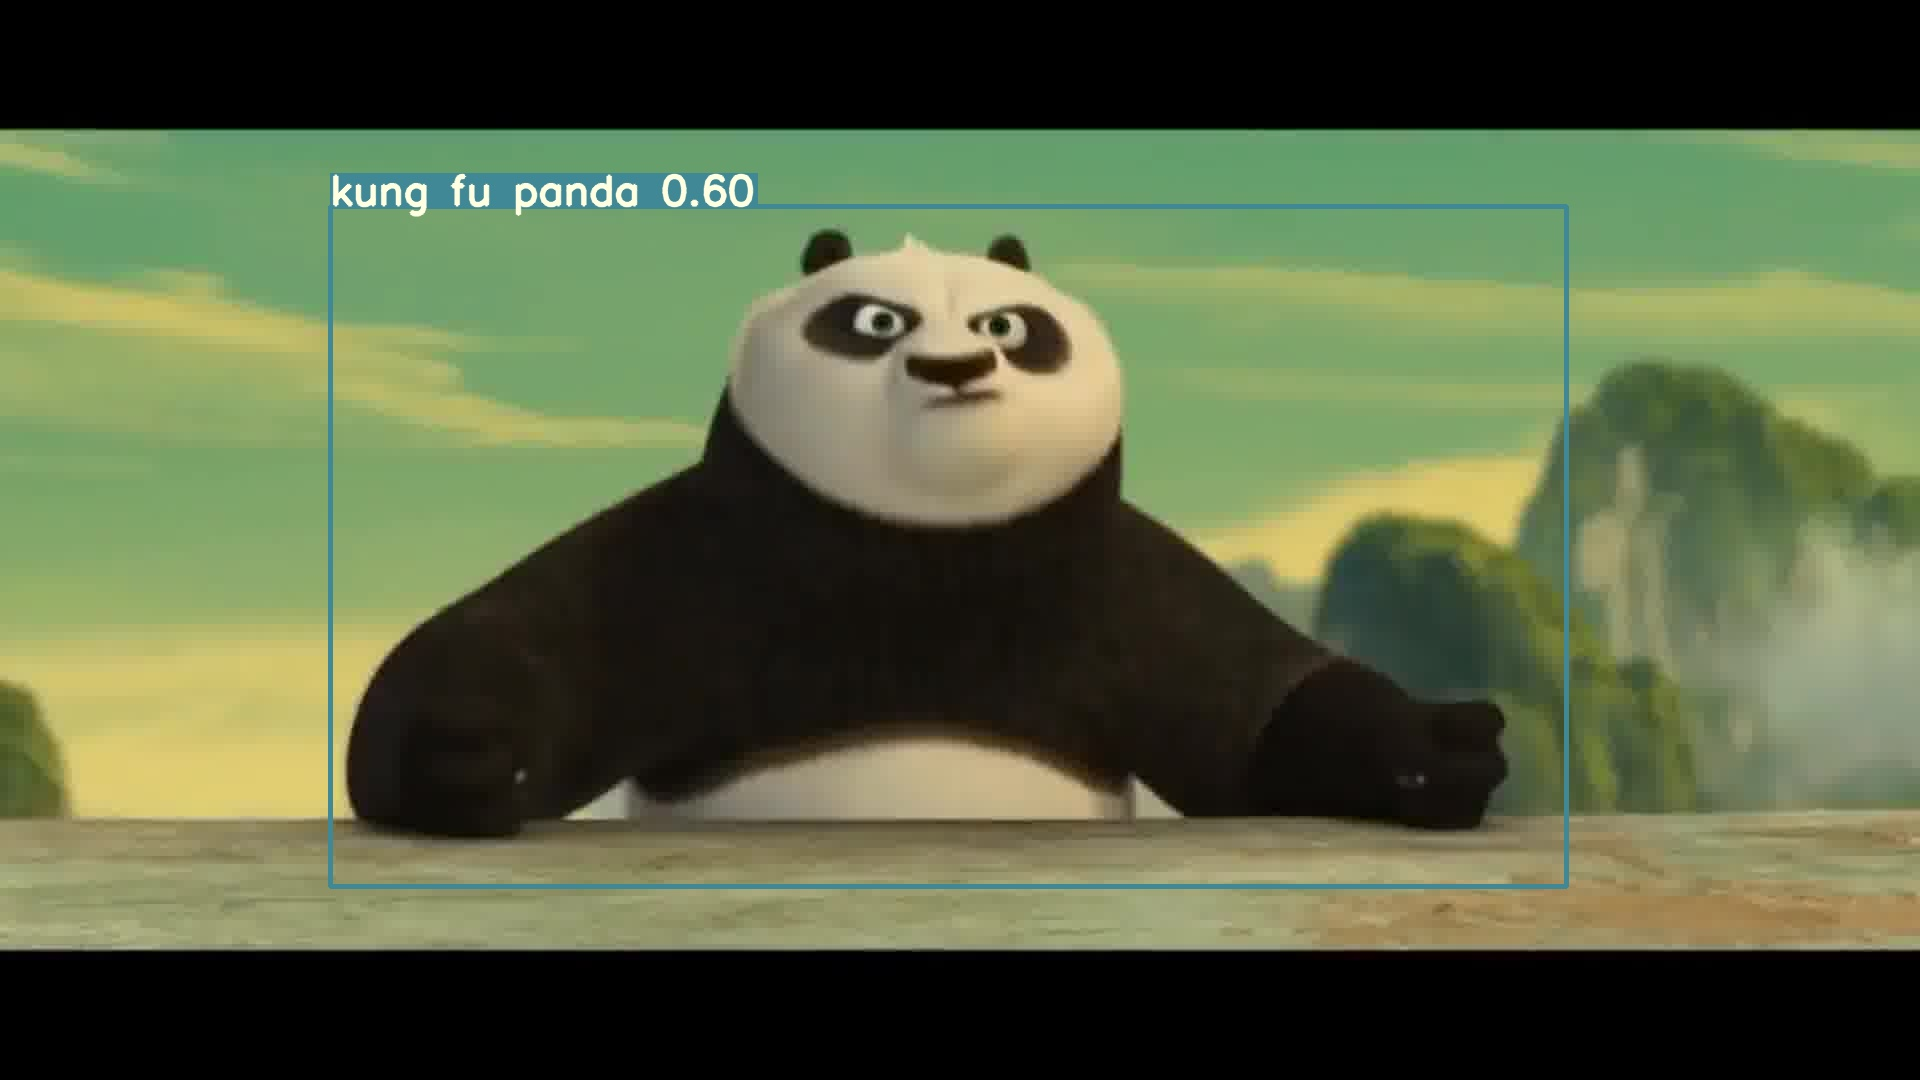

In [0]:
Image(filename='out_out_beginning/img025.jpg', width=600)

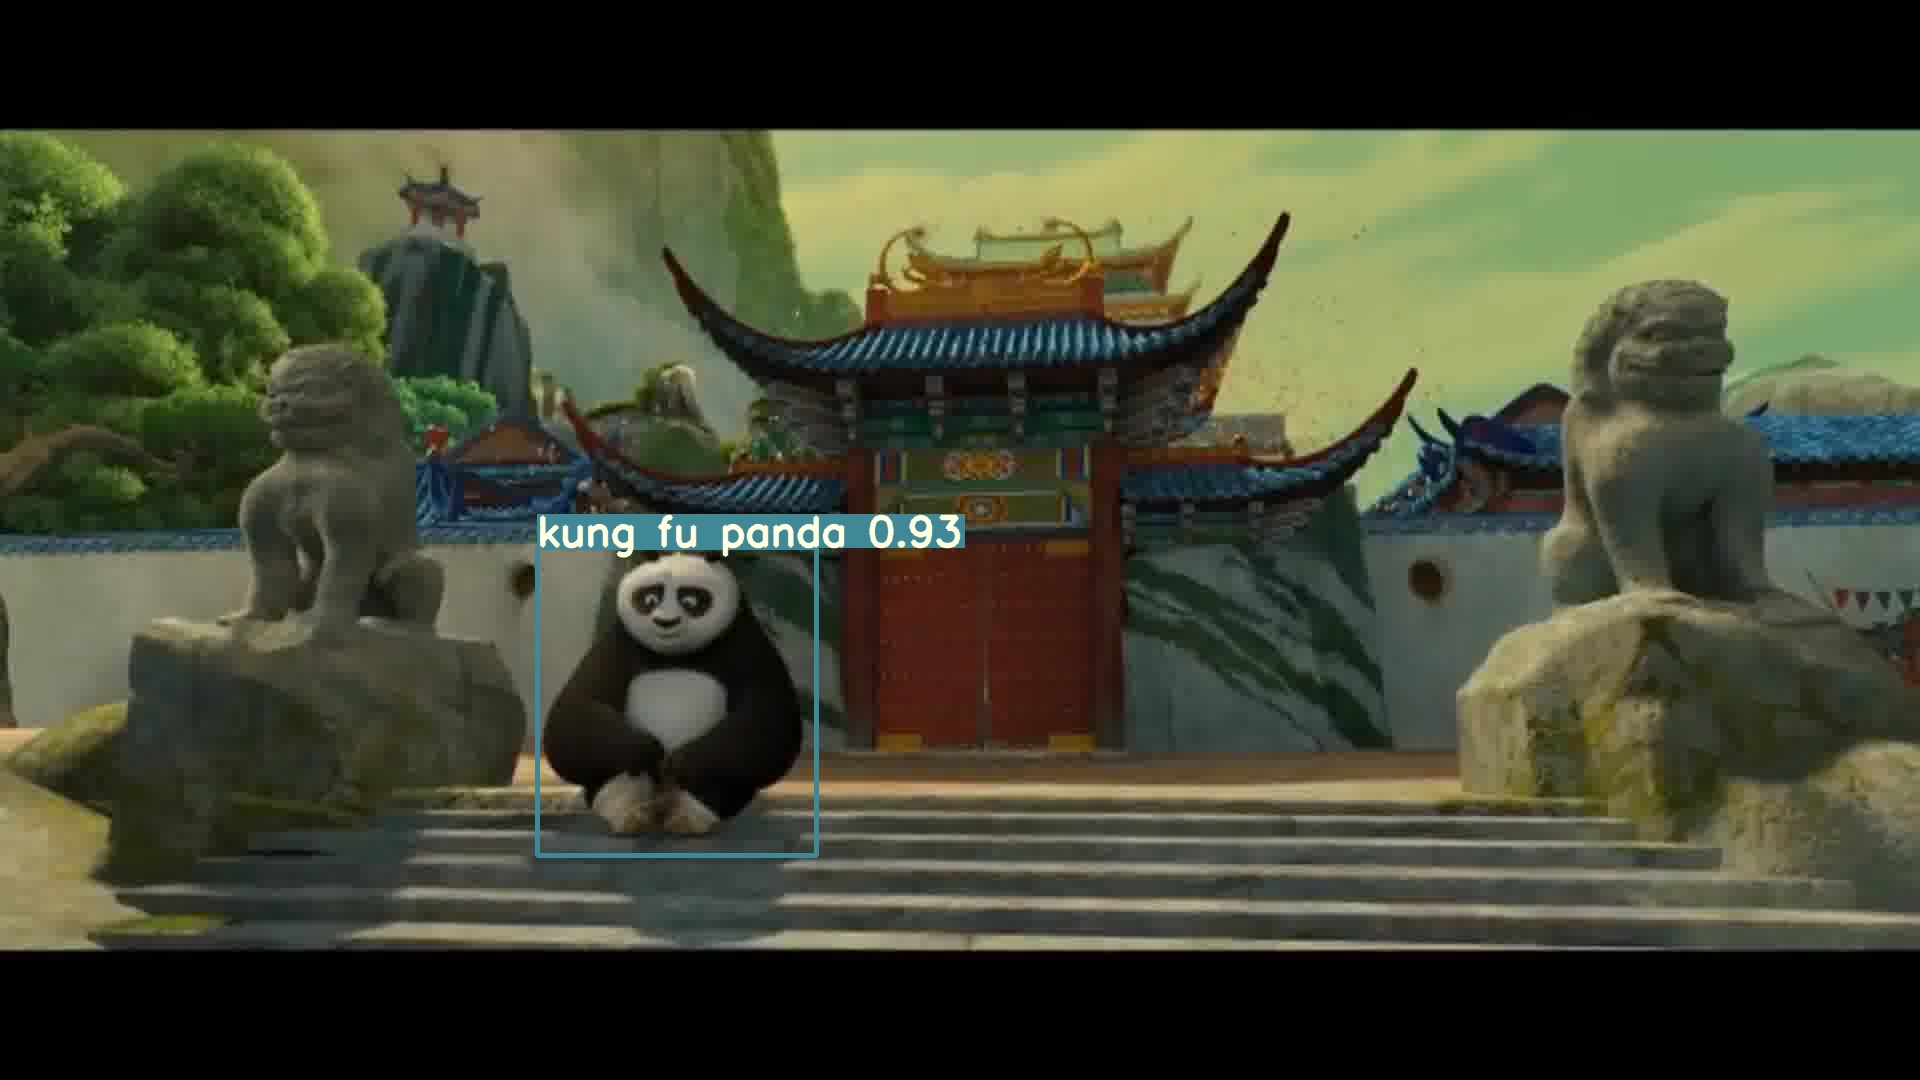

In [0]:
Image(filename='out_out_beginning/img100.jpg', width=600)

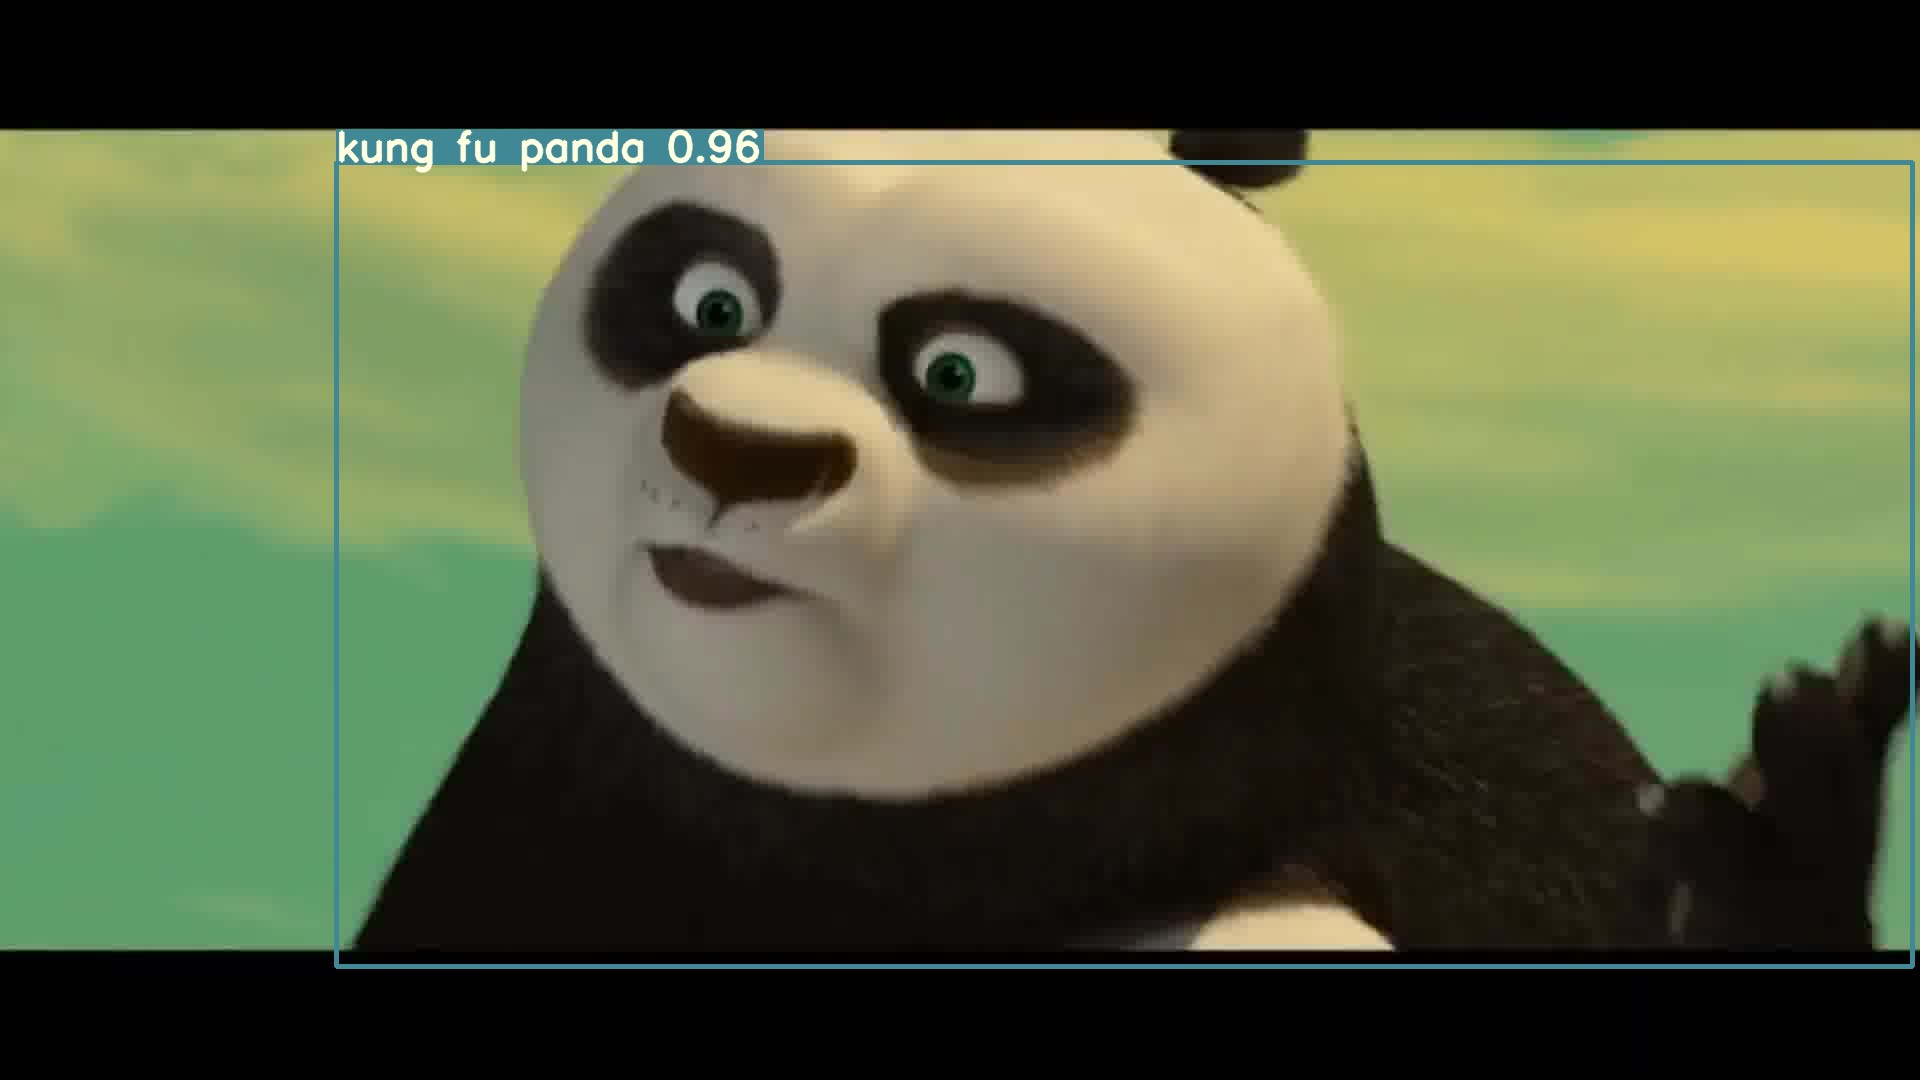

In [0]:
Image(filename='out_out_beginning/img160.jpg', width=600)

In [0]:
# Preparing to detect on further new images

!mkdir /content/YoloV3/data/customdata_detect_opening_battle
!mkdir /content/YoloV3/data/customdata_detect_opening_battle/images

!mkdir /content/YoloV3/out_out_opening_battle

!gsutil cp '/content/gdrive/My Drive/EVA4/Assignment_13/files/data/detect_images_opening_battle/*' /content/YoloV3/data/customdata_detect_opening_battle/images
!gsutil cp '/content/gdrive/My Drive/EVA4/Assignment_13/files/data/kungfupanda_files/Annotation/custom.names' /content/YoloV3/data/customdata_detect_opening_battle/

In [0]:
# Detect on New Imags using after the Model training/Weights File Usage 

!python detect.py --source 'data/customdata_detect_opening_battle/images' --names 'data/customdata_detect_opening_battle/custom.names' --conf-thres 0.1 --output out_out_opening_battle
!gsutil cp /content/YoloV3/out_out_opening_battle/* '/content/gdrive/My Drive/EVA4/Assignment_13/files/data/out_out_opening_battle/' 

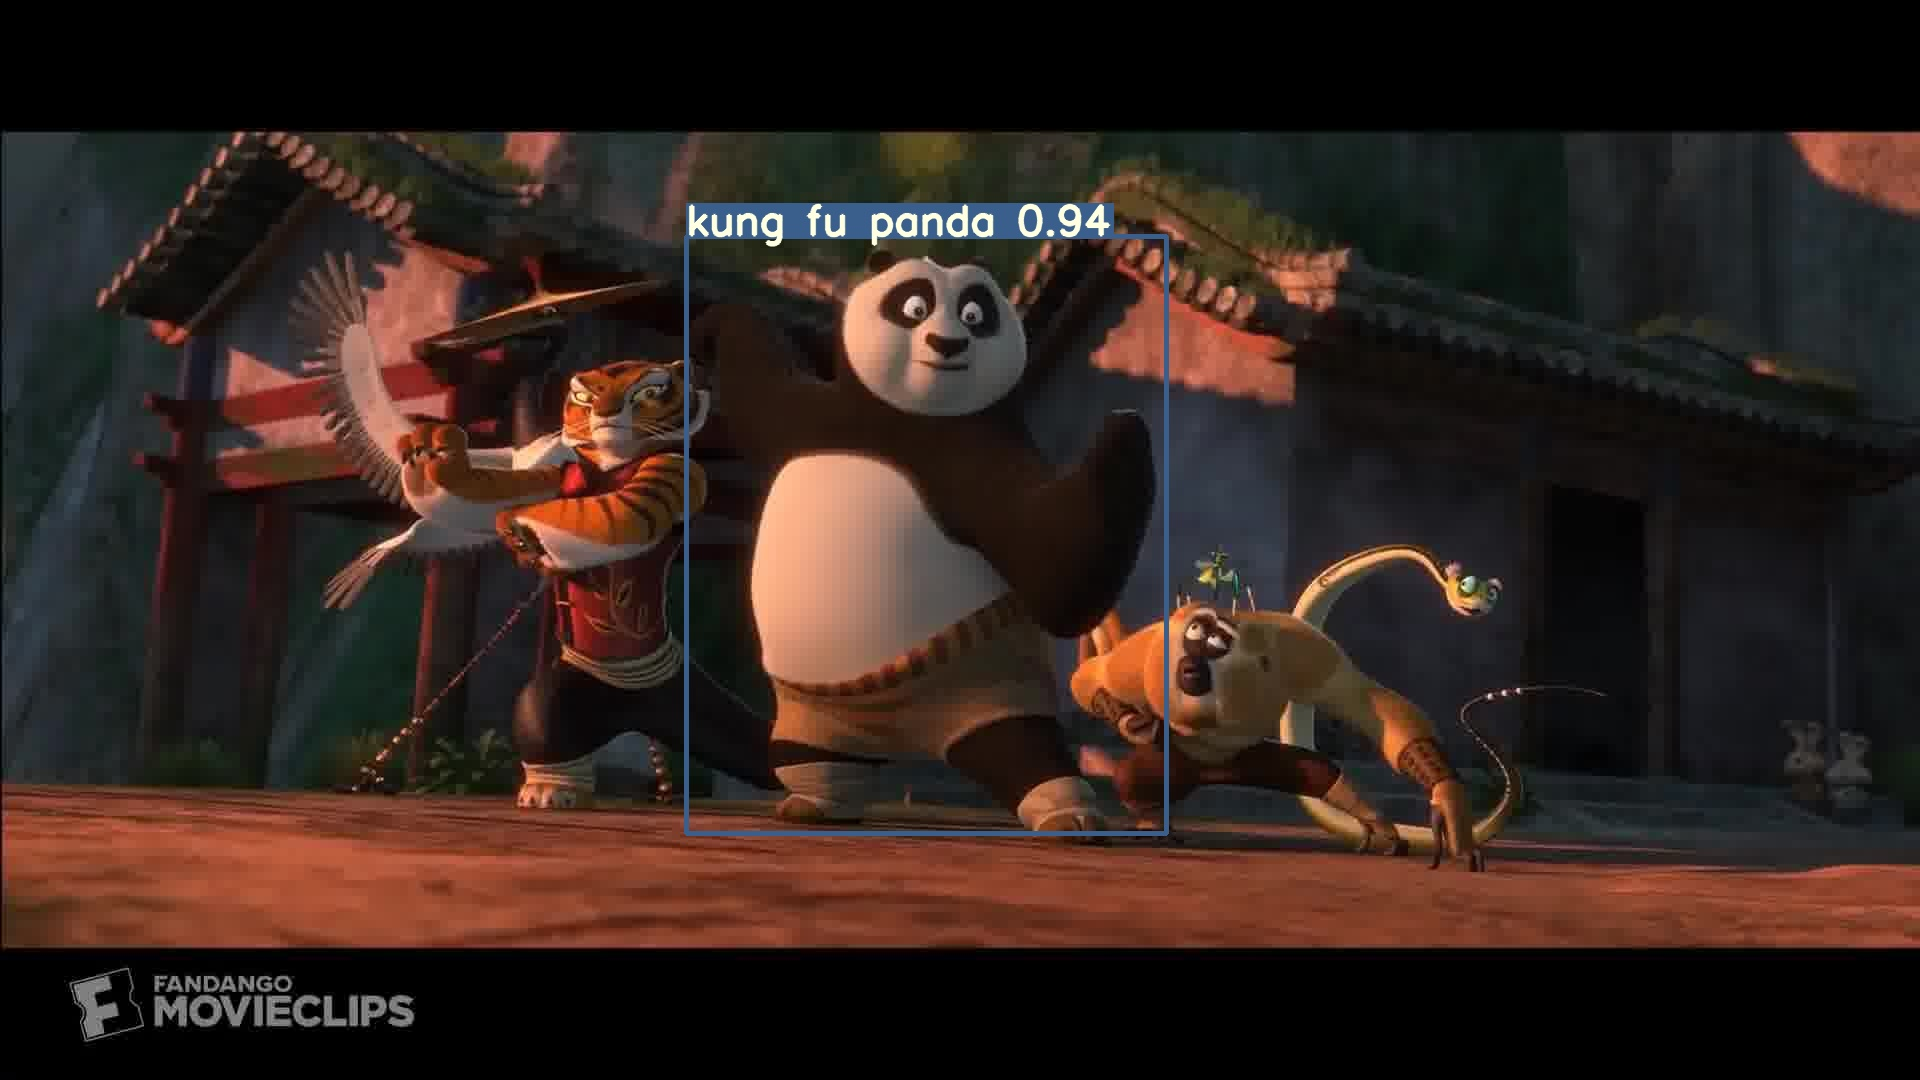

In [0]:
Image(filename='out_out_opening_battle/img1005.jpg', width=600)

The Kung Fu PAnda Class Annotated Video output produced from the Code is as below: 

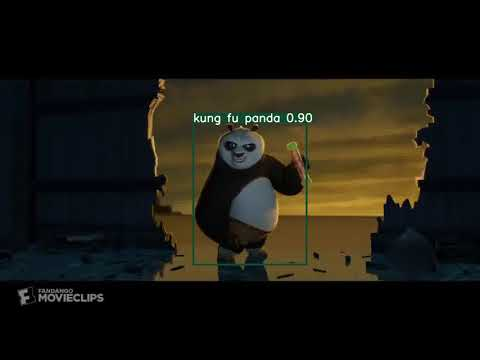

In [4]:
# Display First Yolov3 Learnt Image on Kung Fu Panda Class
# Low Lights Video

from IPython.display import YouTubeVideo, display
video = YouTubeVideo("yk3cm6nScDw", width=500)
display(video)

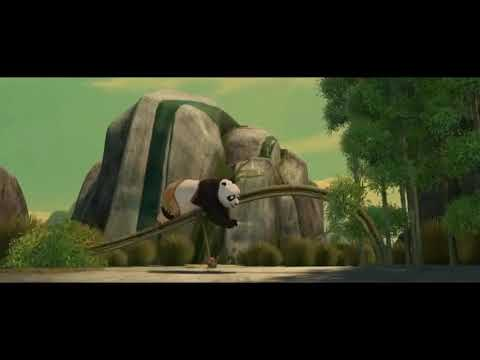

In [2]:
# Display Second Yolov3 Learnt Image on Kung Fu Panda Class
# Video with character in diverse condition/poses 

from IPython.display import YouTubeVideo, display
video = YouTubeVideo("2RDKrh3Eo3s", width=500)
display(video)

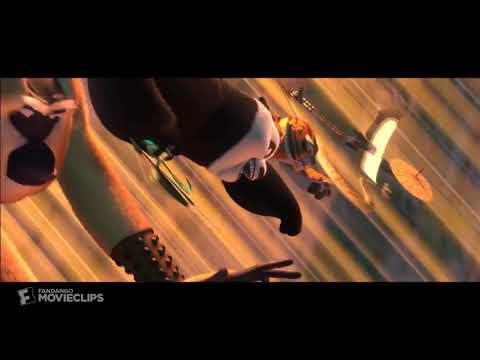

In [3]:
# Display Third Yolov3 Learnt Image on Kung Fu Panda Class
# Video with Many characters involved

from IPython.display import YouTubeVideo, display
video = YouTubeVideo("zcmLTy7knLw", width=500)
display(video)